In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import datasets

from sklearn.metrics.pairwise import euclidean_distances

In [75]:
# blob_a = 1.5 * np.random.rand(10,2)
# blob_a[:, 0] += 4
# blob_b = 1.5 * np.random.rand(10,2)
# blob_b[:, 0] += 10
# blob_c = 1.5 * np.random.rand(30,2)
# blob_c[:, 0] += 5
# blob_c[:, 1] += 5

# data = np.concatenate((blob_a, blob_b, blob_c), axis=0)

# data, y = datasets.make_moons(n_samples=100, shuffle=True)
data, y = datasets.make_blobs(n_samples=1000, centers=3)
num_points = data.shape[0]


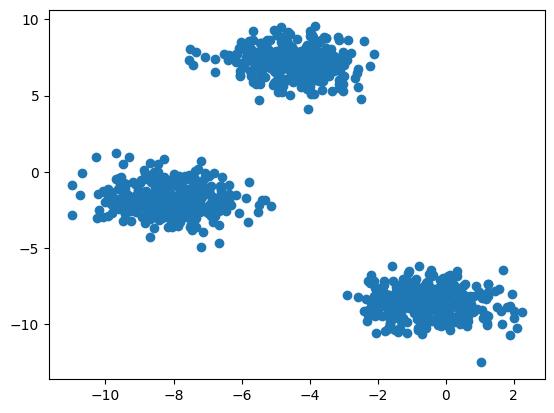

In [76]:
colors = np.array([
    "#377eb8",
    "#ff7f00",
    "#4daf4a",
    "#f781bf",
    "#a65628",
    "#984ea3",
    "#999999",
    "#e41a1c",
    "#dede00",
    "#377eb8",
    "#ff7f00",
    "#4daf4a",
    "#f781bf",
    "#a65628",
    "#984ea3",
    "#999999",
    "#e41a1c",
    "#dede00",
    "#377eb8",
    "#ff7f00",
    "#4daf4a",
    "#f781bf",
    "#a65628",
    "#984ea3",
    "#999999",
    "#e41a1c",
    "#dede00",
    "#377eb8",
    "#ff7f00",
    "#4daf4a",
    "#f781bf",
    "#a65628",
    "#984ea3",
    "#999999",
    "#e41a1c",
    "#dede00",
                    ])

plt.scatter(data[:,0], data[:,1])
# plt.xlim([2, 12])
# plt.ylim([0, 10])

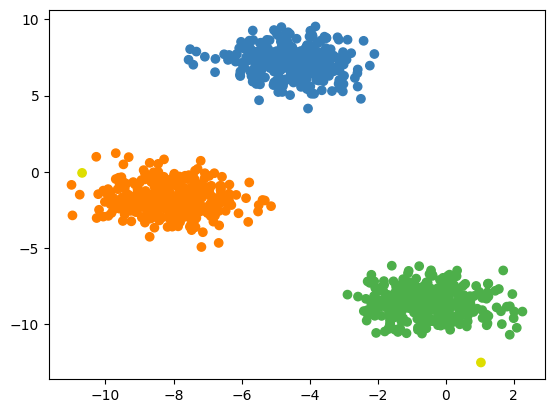

In [77]:
eps = 1.0
n_samples = 10
dbscan = DBSCAN(eps=eps, min_samples=n_samples)
labels_sklearn = dbscan.fit_predict(data)

plt.scatter(data[:,0], data[:,1], color=colors[labels_sklearn])
# plt.xlim([2, 12])
# plt.ylim([0, 10])

In [91]:
core_points = [[-1, -1] for _ in range(num_points)]
for i in range(num_points):
    distances = euclidean_distances(data, [data[i, :]]).reshape(num_points,)
    nbrs = (distances < eps).nonzero()[0]
    if nbrs.shape[0] < n_samples:
        continue
    for j in range(len(distances)):
        if distances[j] < eps:
            for k in range(2):
                if core_points[j][k] == -1:
                    core_points[j][k] = i
                    break

    # nbrs = (distances < eps).nonzero()[0]
    # if nbrs.shape[0] >= n_samples:
    #     for nbr in nbrs:
    #         if core_points[nbr] == -1 or i > core_points[nbr]:
    #             core_points[nbr] = i

# print(core_points)

labels = np.zeros((num_points,), dtype=int)
for i in range(num_points):
    if core_points[i][0] >= 0:
        labels[i] = i
    else:
        labels[i] = -1

converged = False
num_iterations = 0
while not converged:
    num_iterations += 1
    converged = True
    for i in range(num_points):
        if labels[i] == -1:
            continue
        for current_core_idx in core_points[i]:
            if current_core_idx == -1:
                continue
            if labels[i] < labels[current_core_idx]:
                labels[current_core_idx] = labels[i]
                converged = False
            elif labels[i] > labels[current_core_idx]:
                labels[i] = labels[current_core_idx]
                converged = False

print(f"Converged in {num_iterations} iterations")

# print(labels)
num_labels = 0
label_map = {}
for l in labels:
    if l not in label_map:
        label_map[l] = num_labels
        num_labels += 1
label_map[-1] = -1
labels = [label_map[l] for l in labels]

# print(label_map)

Converged in 3 iterations


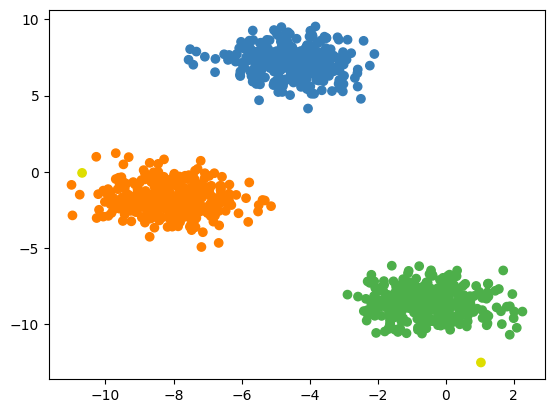

In [92]:
plt.scatter(data[:,0], data[:,1], color=colors[labels])
# plt.xlim([2, 12])
# plt.ylim([0, 10])

# print(np.bincount(labels_sklearn))
# print(np.bincount(labels))